In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from random import gauss, uniform, shuffle
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
def perm_test_loop(X, y, loops = 200):
    og_score = LinearRegression().fit(X, y).score(X, y)

    y2 = y.copy()
    scores = []
    for loop_idx in range(loops):
        shuffle(y2)
        scores.append(LinearRegression().fit(X, y2).score(X, y2))
        
    scores_95 = np.sort(scores)[int(loops * 0.95)]
        
    return scores, og_score, scores_95

In [3]:
def perm_test_2_loop(X, y, loops = 200):
    og_score = sum(X * y)

    y2 = y.copy()
    scores = []
    for loop_idx in range(loops):
        shuffle(y2)
        scores.append(sum(X * y2))
        
    scores_95 = np.sort(scores)[int(loops * 0.95)]
        
    return scores, og_score, scores_95

# Figure 1a

In [4]:
X = []
y_fixed = []

for i in range(100):
    x1 = gauss(0, 1)
    x2 = gauss(0, 1)
    X.append([x1, x2])
    y_fixed.append(uniform(0, 1))

scores, og_score, scores_95 = perm_test_loop(X, y_fixed)

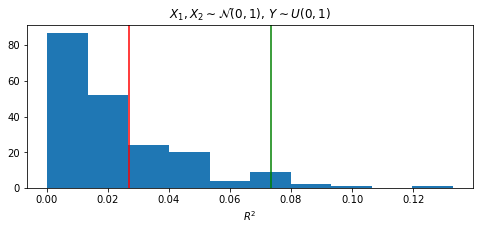

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.hist(scores)
plt.axvline(og_score, c = 'r')
plt.axvline(scores_95, c = 'g')
plt.xlabel(r'$R^2$')
plt.title(r'$X_1,X_2\sim\mathcal{N}(0,1),\,Y\sim U(0,1)$')
plt.savefig('fig1a.jpg', dpi = 300, bbox_inches="tight")

# Figure 1b

In [4]:
og_scores = []
quantiles = []

repeats = 1000

for j in range(repeats):
    X = []
    y_fixed = []
    for i in range(100):
        x1 = gauss(0, 1)
        x2 = gauss(0, 1)
        X.append([x1, x2])
        y_fixed.append(uniform(0, 1))

    scores, og_score, scores_95 = perm_test_loop(X, y_fixed)
    og_scores.append(og_score)
    quantiles.append(scores_95)

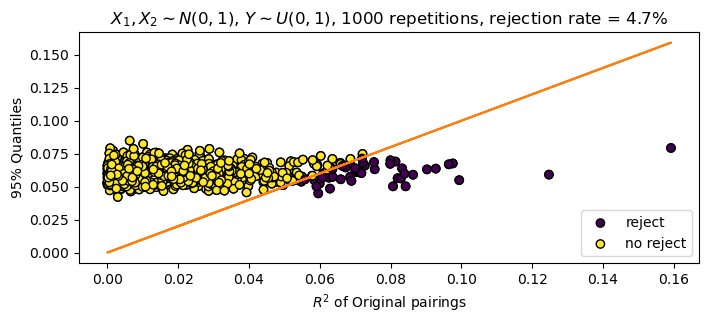

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
ax.scatter(og_scores, quantiles, c = [og_scores[i] > quantiles[i] for i in range(repeats)], ec = 'k', label = 'reject')
ax.scatter(og_scores, quantiles, c = [og_scores[i] < quantiles[i] for i in range(repeats)], ec = 'k', label = 'no reject')
ax.plot(og_scores, og_scores, c = 'C1')
plt.xlabel(r'$R^2$ of Original pairings')
plt.ylabel(r'95% Quantiles')
plt.legend(loc = 'lower right')
rejection_rate = np.mean([og_scores[i] > quantiles[i] for i in range(repeats)])
plt.title(r'$X_1,X_2\sim N(0,1),\,Y\sim U(0,1)$, {} repetitions, rejection rate = {}%'.format(repeats, rejection_rate * 100))
plt.savefig('fig1b.jpg', dpi = 500, bbox_inches="tight")

# Figure 3a

In [9]:
X = []
y_fixed = []
for i in range(100):
    x1 = gauss(1, 1)
    x2 = gauss(0, 1)
    X.append([x1, x2])
    eps = gauss(0, 1)
    y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

scores, og_score, scores_95 = perm_test_loop(X, y_fixed)

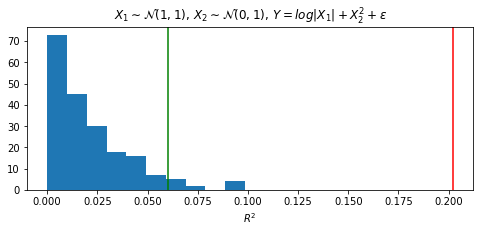

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.hist(scores)
plt.axvline(og_score, c = 'r')
plt.axvline(scores_95, c = 'g')
plt.xlabel(r'$R^2$')
plt.title(r'$X_1\sim\mathcal{N}(1,1),\,X_2\sim\mathcal{N}(0,1),\,Y=log|X_1|+X_2^2+\epsilon$')
plt.savefig('fig3a.jpg', dpi = 300, bbox_inches = "tight")

# Figure 3b

In [6]:
og_scores = []
quantiles = []

repeats = 1000

for j in range(repeats):
    X = []
    y_fixed = []
    for i in range(100):
        x1 = gauss(1, 1)
        x2 = gauss(0, 1)
        X.append([x1, x2])
        eps = gauss(0, 1)
        y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

    scores, og_score, scores_95 = perm_test_loop(X, y_fixed)
    og_scores.append(og_score)
    quantiles.append(scores_95)

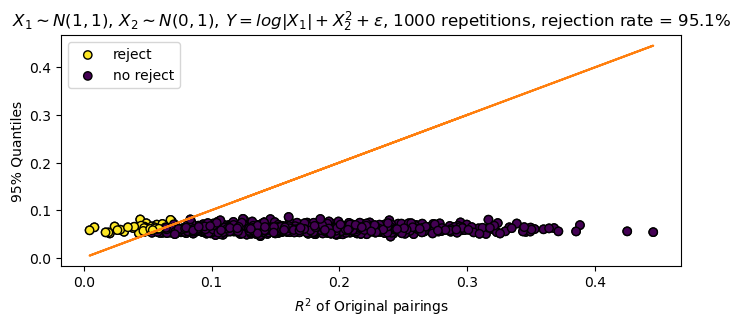

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
ax.scatter(og_scores, quantiles, c = [og_scores[i] > quantiles[i] for i in range(repeats)], ec = 'k', label = 'reject')
ax.scatter(og_scores, quantiles, c = [og_scores[i] < quantiles[i] for i in range(repeats)], ec = 'k', label = 'no reject')
ax.plot(og_scores, og_scores, c = 'C1')
plt.xlabel(r'$R^2$ of Original pairings')
plt.ylabel(r'95% Quantiles')
plt.legend(loc = 'upper left')
rejection_rate = np.mean([og_scores[i] > quantiles[i] for i in range(repeats)])
plt.title(r'$X_1\sim N(1,1),\,X_2\sim N(0,1),\,Y=log|X_1|+X_2^2+\epsilon$, {} repetitions, rejection rate = {}%'.format(repeats, rejection_rate * 100))
plt.savefig('fig3b.jpg', dpi = 500, bbox_inches = "tight")

# Figure 5a

In [4]:
og_score_table = []
scores_95_table = []
a_range = np.arange(0, 10, 0.1)

for a in a_range:
    X = []
    y_fixed = []
    for i in range(100):
        x1 = gauss(a, 1)
        x2 = gauss(0, 0.1)
        X.append([x1, x2])
        eps = gauss(0, 0.1)
        y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop(X, y_fixed)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

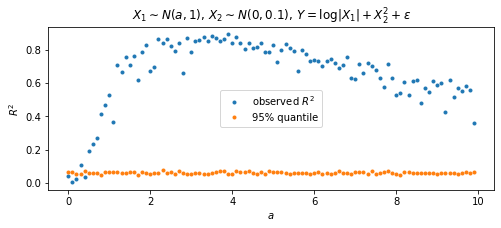

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(a_range, og_score_table, '.', label = r'observed $R^2$')
plt.plot(a_range, scores_95_table, '.', label = r'95% quantile')
plt.legend()
plt.title(r'$X_1\sim N(a,1),\,X_2\sim N(0, 0.1),\,Y = \log|X_1| + X_2^2 + \epsilon$')
plt.xlabel(r'$a$')
plt.ylabel(r'$R^2$')
plt.savefig('fig5a.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 5b

In [6]:
a_range = np.arange(0, 10, 0.1)

repeats = 100
rejection_rate_table = []

for a in a_range:
    og_score_table = []
    scores_95_table = []
    for loop_idx in range(repeats):
        X = []
        y_fixed = []
        for i in range(100):
            x1 = gauss(a, 1)
            x2 = gauss(0, 0.1)
            X.append([x1, x2])
            eps = gauss(0, 0.1)
            y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

        model = LinearRegression()
        scores, og_score, scores_95 = perm_test_loop(X, y_fixed)
        og_score_table.append(og_score)
        scores_95_table.append(scores_95)
    rejection_rate_table.append(np.mean([og_score_table[i] > scores_95_table[i] for i in range(repeats)]))
    print(a)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1000000000000005
4.2
4.3
4.4
4.5
4.6000000000000005
4.7
4.800000000000001
4.9
5.0
5.1000000000000005
5.2
5.300000000000001
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.9
6.0
6.1000000000000005
6.2
6.300000000000001
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.0
7.1000000000000005
7.2
7.300000000000001
7.4
7.5
7.6000000000000005
7.7
7.800000000000001
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.700000000000001
8.8
8.9
9.0
9.1
9.200000000000001
9.3
9.4
9.5
9.600000000000001
9.700000000000001
9.8
9.9


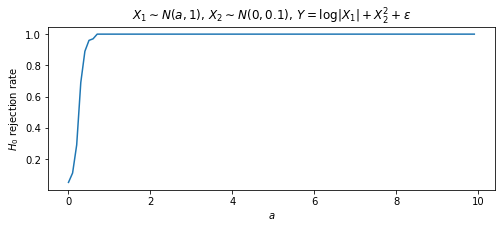

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(a_range, rejection_rate_table)
plt.title(r'$X_1\sim N(a,1),\,X_2\sim N(0, 0.1),\,Y = \log|X_1| + X_2^2 + \epsilon$')
plt.xlabel(r'$a$')
plt.ylabel(r'$H_0$ rejection rate')
plt.savefig('fig5b.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 6a

In [49]:
og_score_table = []
scores_95_table = []

a_range = np.arange(0, 10, 0.01)

for a in a_range:
    X = []
    y_fixed = []
    for i in range(100):
        x1 = gauss(a, 1)
        x2 = gauss(0, 0.5)
        X.append([x1, x2])
        eps = gauss(0, 0.1)
        y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop(X, y_fixed)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

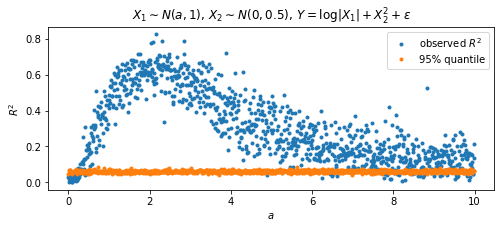

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(a_range, og_score_table, '.', label = r'observed $R^2$')
plt.plot(a_range, scores_95_table, '.', label = r'95% quantile')
plt.legend()
plt.title(r'$X_1\sim N(a,1),\,X_2\sim N(0, 0.5),\,Y = \log|X_1| + X_2^2 + \epsilon$')
plt.xlabel(r'$a$')
plt.ylabel(r'$R^2$')
plt.savefig('fig6a.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 6b

In [52]:
a_range = np.arange(0, 10, 0.1)
rejection_rate_table = []

for a in a_range:
    og_score_table = []
    scores_95_table = []
    for loop_idx in range(repeats):
        X = []
        y_fixed = []
        for i in range(100):
            x1 = gauss(a, 1)
            x2 = gauss(0, 0.5)
            X.append([x1, x2])
            eps = gauss(0, 0.1)
            y_fixed.append(np.log(np.abs(x1)) + x2 ** 2 + eps)

        model = LinearRegression()
        scores, og_score, scores_95 = perm_test_loop(X, y_fixed)
        og_score_table.append(og_score)
        scores_95_table.append(scores_95)
    rejection_rate_table.append(np.mean([og_score_table[i] > scores_95_table[i] for i in range(repeats)]))
    print(a)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0
3.1
3.2
3.3000000000000003
3.4000000000000004
3.5
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1000000000000005
4.2
4.3
4.4
4.5
4.6000000000000005
4.7
4.800000000000001
4.9
5.0
5.1000000000000005
5.2
5.300000000000001
5.4
5.5
5.6000000000000005
5.7
5.800000000000001
5.9
6.0
6.1000000000000005
6.2
6.300000000000001
6.4
6.5
6.6000000000000005
6.7
6.800000000000001
6.9
7.0
7.1000000000000005
7.2
7.300000000000001
7.4
7.5
7.6000000000000005
7.7
7.800000000000001
7.9
8.0
8.1
8.200000000000001
8.3
8.4
8.5
8.6
8.700000000000001
8.8
8.9
9.0
9.1
9.200000000000001
9.3
9.4
9.5
9.600000000000001
9.700000000000001
9.8
9.9


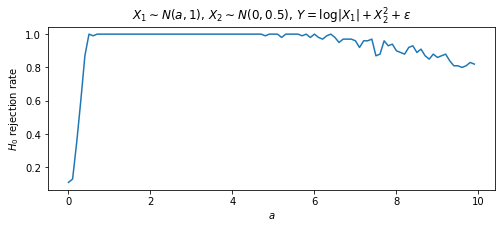

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(a_range, rejection_rate_table)
plt.title(r'$X_1\sim N(a,1),\,X_2\sim N(0, 0.5),\,Y = \log|X_1| + X_2^2 + \epsilon$')
plt.xlabel(r'$a$')
plt.ylabel(r'$H_0$ rejection rate')
plt.savefig('fig6b.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 7a

In [54]:
og_score_table = []
scores_95_table = []
eps_range = np.arange(0, 1, 0.001)

mean = [0, 0]

for eps in eps_range:
    cov = [[1, eps], [eps, 1]]
    X, y = np.random.multivariate_normal(mean, cov, 100).T

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

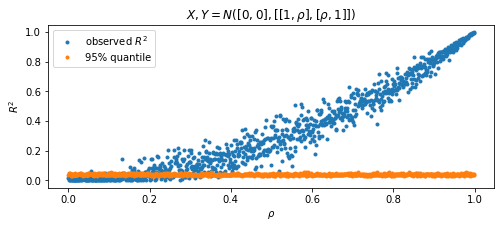

In [56]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(eps_range, og_score_table, '.', label = r'observed $R^2$')
plt.plot(eps_range, scores_95_table, '.', label = r'95% quantile')
plt.legend()
plt.title(r'$X,Y = N([0, 0],[[1,\rho], [\rho, 1]])$')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$R^2$')
plt.savefig('fig7a.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 7b

In [57]:
eps_range = np.arange(0, 1, 0.01)

mean = [0, 0]
repeats = 100

rejection_rate_table = []

for eps in eps_range:
    og_score_table = []
    scores_95_table = []
    for loop_idx in range(repeats):
        cov = [[1, eps], [eps, 1]]
        X, y = np.random.multivariate_normal(mean, cov, 100).T

        model = LinearRegression()
        scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
        og_score_table.append(og_score)
        scores_95_table.append(scores_95)
    rejection_rate_table.append(np.mean([og_score_table[i] > scores_95_table[i] for i in range(repeats)]))
    print(eps)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99


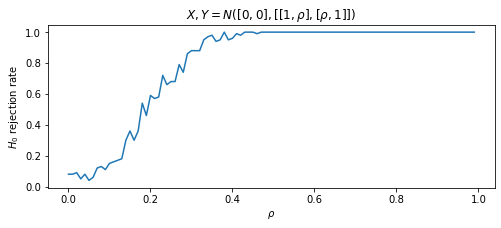

In [64]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(eps_range, rejection_rate_table[100:])
plt.title(r'$X,Y = N([0, 0],[[1,\rho], [\rho, 1]])$')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$H_0$ rejection rate')
plt.savefig('fig7b.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 8a

In [65]:
og_score_table = []
scores_95_table = []
eps_range = np.sort(np.concatenate((np.arange(10, 100, 10), 
                                    np.arange(100,1000,10))))

mean = [0, 0]
cov = [[1, 0], [0, 1]]

for eps in eps_range:
    X, y = np.random.multivariate_normal(mean, cov, eps).T

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

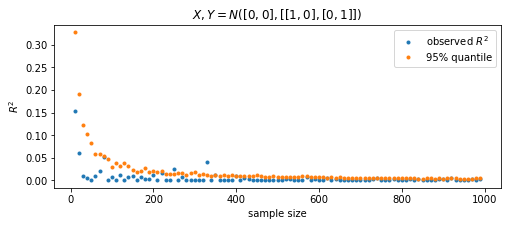

In [66]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(eps_range, og_score_table, '.', label = r'observed $R^2$')
plt.plot(eps_range, scores_95_table, '.', label = r'95% quantile')
plt.legend()
plt.title(r'$X, Y = N([0, 0], [[1,0], [0, 1]])$')
plt.xlabel(r'sample size')
plt.ylabel(r'$R^2$')
plt.savefig('fig8a.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 8b

In [ ]:
eps_range = np.arange(10, 1000, 10)

mean = [0, 0]
cov = [[1, 0], [0, 1]]
rejection_rate_table = []
repeats = 100

for eps in eps_range:
    og_score_table = []
    scores_95_table = []
    for loop_idx in range(repeats):
        X, y = np.random.multivariate_normal(mean, cov, eps).T

        model = LinearRegression()
        scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
        og_score_table.append(og_score)
        scores_95_table.append(scores_95)
    rejection_rate_table.append(np.mean([og_score_table[i] > scores_95_table[i] for i in range(repeats)]))
    clear_output()
    print(eps)

430


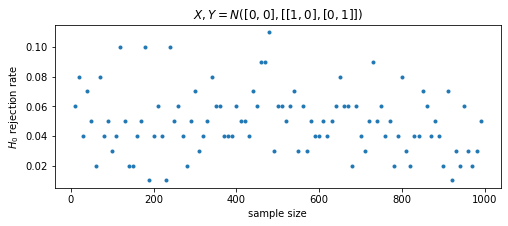

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(eps_range, rejection_rate_table, '.')
plt.title(r'$X,Y = N([0, 0],[[1,0], [0, 1]])$')
plt.xlim(0, 0.3)
plt.xlabel(r'sample size')
plt.ylabel(r'$H_0$ rejection rate')
plt.savefig('fig8b.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 9a

In [78]:
og_score_table = []
scores_95_table = []
eps_range = np.arange(10, 300, 3)

for eps in eps_range:
    X = np.random.normal(5, 1, eps)
    y = np.log(X) + np.random.normal(0, 1, eps)

    model = LinearRegression()
    scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
    og_score_table.append(og_score)
    scores_95_table.append(scores_95)

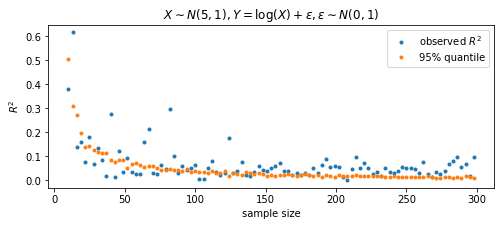

In [79]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(eps_range, og_score_table, '.', label = r'observed $R^2$')
plt.plot(eps_range, scores_95_table, '.', label = r'95% quantile')
plt.legend()
plt.title(r'$X\sim N(5, 1), Y = \log(X) + \epsilon, \epsilon\sim N(0, 1)$')
plt.xlabel(r'sample size')
plt.ylabel(r'$R^2$')
plt.savefig('fig9a.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 9b

In [13]:
eps_range = np.arange(10, 300, 3)
rejection_rate_table = []

for eps in eps_range:
    og_score_table = []
    scores_95_table = []
    for loop_idx in range(repeats):
        X = np.random.normal(5, 1, eps)
        y = np.log(np.abs(X)) + np.random.normal(0, 1, eps)

        model = LinearRegression()
        scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
        og_score_table.append(og_score)
        scores_95_table.append(scores_95)
    rejection_rate_table.append(np.mean([og_score_table[i] > scores_95_table[i] for i in range(repeats)]))
    print(eps)

10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238
241
244
247
250
253
256
259
262
265
268
271
274
277
280
283
286
289
292
295
298


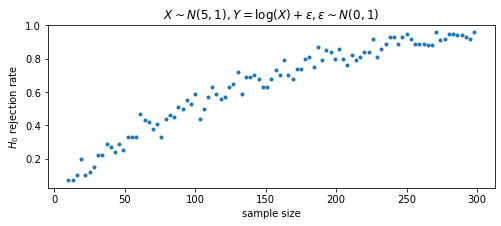

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(eps_range, rejection_rate_table, '.')
plt.title(r'$X\sim N(5, 1), Y = \log(X) + \epsilon, \epsilon\sim N(0, 1)$')
plt.xlabel(r'sample size')
plt.ylabel(r'$H_0$ rejection rate')
plt.savefig('fig9b.jpg', dpi = 500, bbox_inches = "tight")
plt.show()

# Figure 10

In [4]:
rho_range = np.arange(0, 1, 0.01)

mean = [0, 0]
repeats = 100

rejection_rate_table = []
rejection_rate2_table = []

for rho in rho_range:
    og_score_table = []
    scores_95_table = []
    
    og_score_2_table = []
    scores_95_2_table = []
    for loop_idx in range(repeats):
        cov = [[1, rho], [rho, 1]]
        X, y = np.random.multivariate_normal(mean, cov, 100).T

        model = LinearRegression()
        scores, og_score, scores_95 = perm_test_loop([[x] for x in X], y)
        og_score_table.append(og_score)
        scores_95_table.append(scores_95)
        
        X, y = np.random.multivariate_normal(mean, cov, 100).T
        scores, og_score, scores_95 = perm_test_2_loop(X, y)
        og_score_2_table.append(og_score)
        scores_95_2_table.append(scores_95)
    rejection_rate_table.append(np.mean([og_score_table[i] > scores_95_table[i] for i in range(repeats)]))
    rejection_rate2_table.append(np.mean([og_score_2_table[i] > scores_95_2_table[i] for i in range(repeats)]))
    clear_output(wait=True)
    print(rho)

0.99


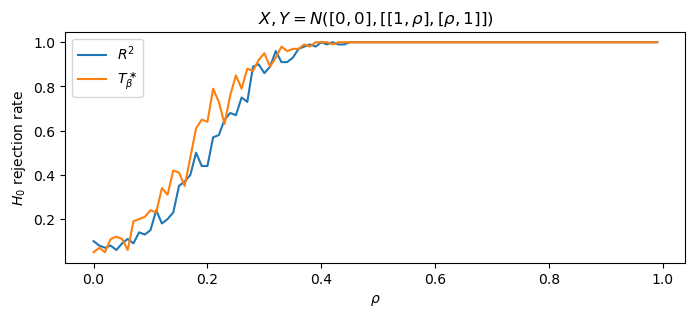

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8, 3))
plt.plot(rho_range, rejection_rate_table, label = r'$R^2$')
plt.plot(rho_range, rejection_rate2_table, label = r'$T^\ast_\beta$')
plt.title(r'$X,Y = N([0, 0],[[1,\rho], [\rho, 1]])$')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$H_0$ rejection rate')
plt.legend()
plt.savefig('fig10.jpg', dpi = 500, bbox_inches = "tight")
plt.show()